In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}"
.format(x)})

In [3]:
def tridiag(N,a,b):
    M=np.zeros([N+2,N+2])
    for i in range(1,N):
        M[i][i] = a
        M[i][i+1] = b
        M[i+1][i] = b
        M[N][N] = a
    return M

def eigensystem(N):
    dz = 1/(N+1)
    M = -(1/dz)**2*tridiag(N,-2,1)
    eigenvalues,vec = np.linalg.eig(M)
    indices = np.argsort(eigenvalues)
    eigenvalues_sorted = eigenvalues[indices]
    eigenvectors_sorted = vec[:,indices]
    
    signs = np.sign(eigenvectors_sorted[1, :])
    signs[signs == 0] = 1
    vec_signed = eigenvectors_sorted * signs
    
    norms = np.sqrt(integrate.simpson(vec_signed**2, dx=1.0/vec_signed.shape[0], axis=0))
    eigenvec = vec_signed / norms
    
    return eigenvalues_sorted,eigenvec

In [5]:
def Xi_k(k):
    '''returns the analytic value of Ξk for the k’th eigenvalue'''
    return (k*np.pi)**2

def zarr(N):
    ''' returns an array of z values from (0,1) with N intermediate points'''
    z = np.linspace(0, 1, N+2)
    return z
    
def normwaves(z, k):
    ''' returns an array of vals of the same length as z that are the normalized eigenstate wavefunctions'''
    psi_an = np.sin(k*np.pi*z) * np.sqrt(2)
    return psi_an

In [9]:
'''
Write print statements that print out the k = 2 value of Ξ, an array of z values for N = 99, and
the vector corresponding to the k = 2 eigenstate wavefunction ￿2 over the array of z values
'''
k = 2
N = 99
z = zarr(N)

print(f'k=2 value of Ξ: {Xi_k(k)}\n')
print(f'array of z values for N=99:\n{z}\n')
print(f'k=2 eigenstate wavefunction 2 over z values:\n{normwaves(z,k)}')

k=2 value of Ξ: 39.47841760435743

array of z values for N=99:
[0.00000 0.01000 0.02000 0.03000 0.04000 0.05000 0.06000 0.07000 0.08000
 0.09000 0.10000 0.11000 0.12000 0.13000 0.14000 0.15000 0.16000 0.17000
 0.18000 0.19000 0.20000 0.21000 0.22000 0.23000 0.24000 0.25000 0.26000
 0.27000 0.28000 0.29000 0.30000 0.31000 0.32000 0.33000 0.34000 0.35000
 0.36000 0.37000 0.38000 0.39000 0.40000 0.41000 0.42000 0.43000 0.44000
 0.45000 0.46000 0.47000 0.48000 0.49000 0.50000 0.51000 0.52000 0.53000
 0.54000 0.55000 0.56000 0.57000 0.58000 0.59000 0.60000 0.61000 0.62000
 0.63000 0.64000 0.65000 0.66000 0.67000 0.68000 0.69000 0.70000 0.71000
 0.72000 0.73000 0.74000 0.75000 0.76000 0.77000 0.78000 0.79000 0.80000
 0.81000 0.82000 0.83000 0.84000 0.85000 0.86000 0.87000 0.88000 0.89000
 0.90000 0.91000 0.92000 0.93000 0.94000 0.95000 0.96000 0.97000 0.98000
 0.99000 1.00000]

k=2 eigenstate wavefunction 2 over z values:
[0.00000 0.08880 0.17725 0.26500 0.35170 0.43702 0.52061 0.60214 0.681

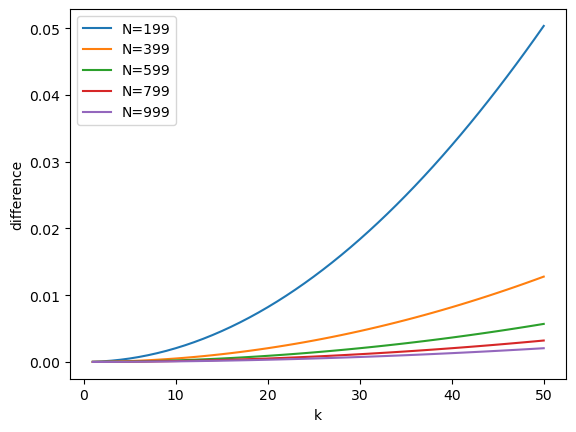

In [11]:
Narr = [199, 399, 599, 799, 999]
karr = np.linspace(1,50,50)
Xi = Xi_k(karr)

for N in Narr:
    eigenvals, eigenvecs = eigensystem(N)
    diff = np.abs(eigenvals[2:52] - Xi)/Xi #skip first two 0 eigenvectors
    plt.plot(karr, diff, label=f'N={N}')

plt.xlabel('k')
plt.ylabel('difference')
plt.legend()

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7639/3600475014.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(zarr(997), scale_psi + eigenvals[i+2], label=f'$\Psi_k$ for k={i+1}')


Text(0.5, 0, '$z$')

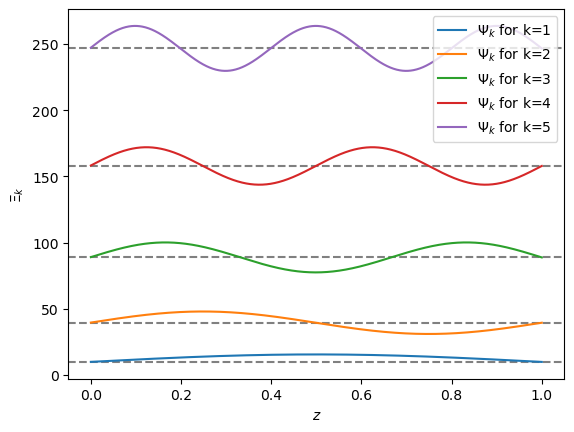

In [13]:
#plots a horizontal line representing Ξ_k for the smallest five eigenvalues
for i in range(2, 7):
    plt.axhline(y=eigenvals[i], color= 'gray', ls='--')

#a scaled line representing the k’th eigenstate, ￿k, that uses its eigenvalue as an axis
for i in range(5):
    scale_psi = eigenvecs[2:, i+2] * 2*(i+2) #scaling to make it so theres no overlap
    plt.plot(zarr(997), scale_psi + eigenvals[i+2], label=f'$\Psi_k$ for k={i+1}')
    
plt.legend()
plt.ylabel('$Ξ_k$')
plt.xlabel('$z$')

<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\P'
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7639/1575055653.py:15: SyntaxWarning: invalid escape sequence '\P'
  axes[i].set_title(f'$\Psi$ diff for k={k[i]+1}')
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7639/1575055653.py:17: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_ylabel('$\Delta\Psi(z)$')
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7639/1575055653.py:21: SyntaxWarning: invalid escape sequence '\D'
  ax3[1].set_ylabel('$\Delta\Psi(z)$')
/var/folders/dk/zjndy5f576z9r9smf9q_r5l40000gn/T/ipykernel_7639/1575055653.py:22: Sy

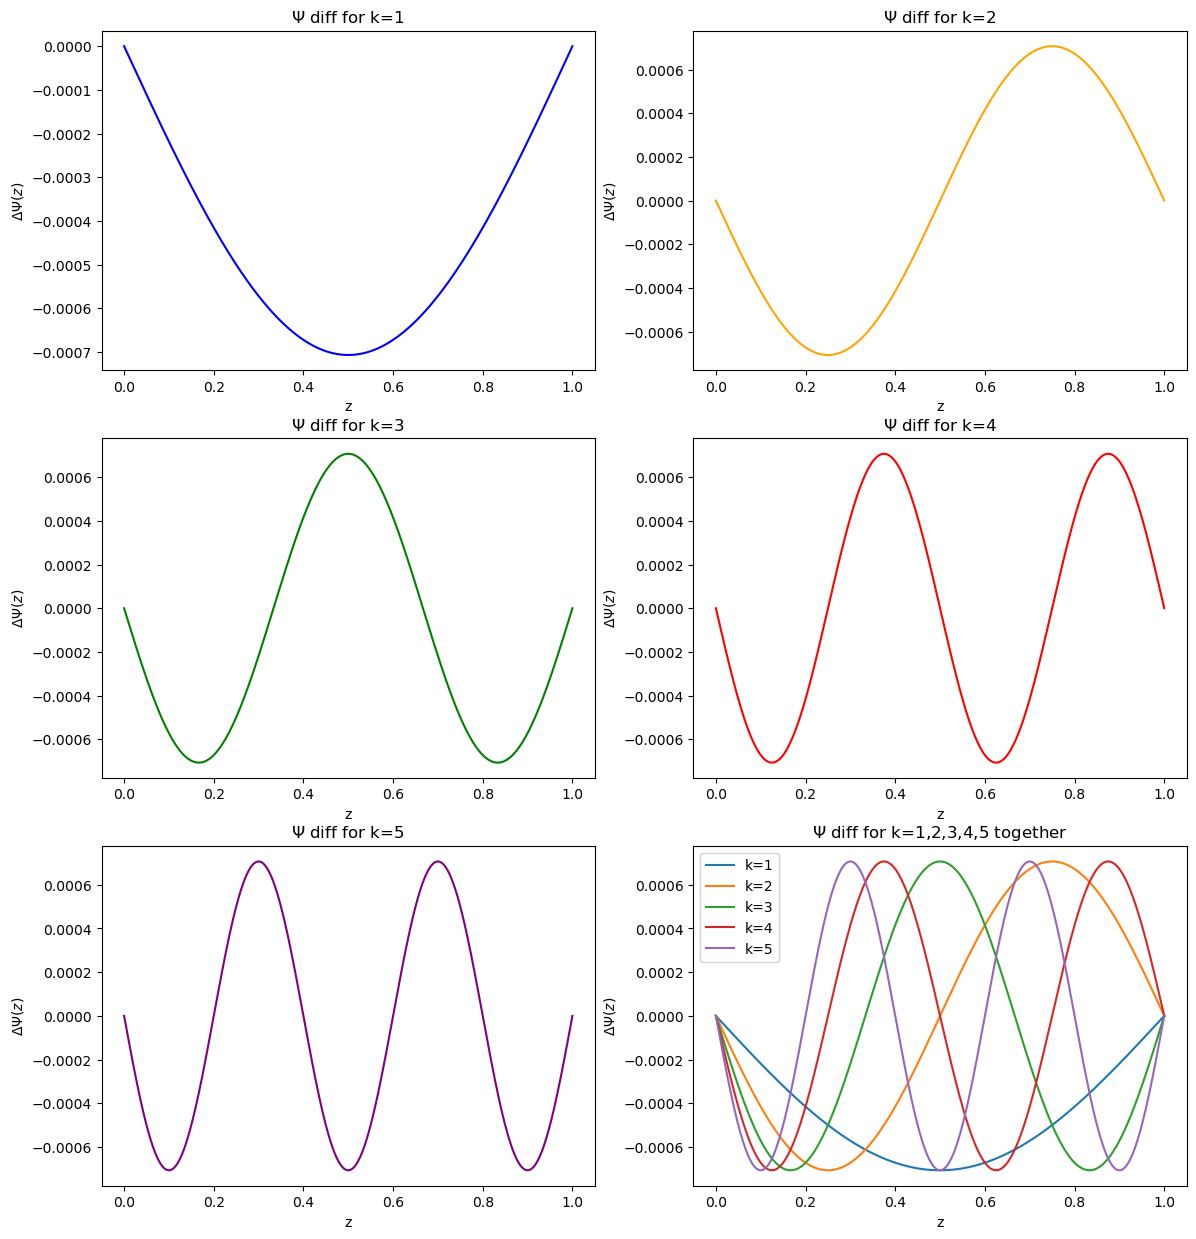

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(14, 15))
axes = np.array([ax1[0], ax1[1], ax2[0], ax2[1], ax3[0]])
colours = ['b','orange','g','r','purple']

k = np.arange(5)
psi_nu = np.zeros((5, 999+2))
for i in range(5):
    psi_nu[i, :] = eigenvecs[:, i+2]
    
for i in range(5):
    psi_exact = normwaves(zarr(999), k[i]+1)
    psi_num = psi_nu[i, :]
    psi_diff = psi_exact - psi_num
    axes[i].plot(zarr(999), psi_diff, color=colours[i])
    axes[i].set_title(f'$\Psi$ diff for k={k[i]+1}')
    axes[i].set_xlabel('z')
    axes[i].set_ylabel('$\Delta\Psi(z)$')
    ax3[1].plot(zarr(999), psi_diff, label=f'k={i+1}')
    
ax3[1].set_xlabel('z')
ax3[1].set_ylabel('$\Delta\Psi(z)$')
ax3[1].set_title('$\Psi$ diff for k=1,2,3,4,5 together')
ax3[1].legend()

When using this technology, the accuracy/precision of the utilized methods can affect the results. For example, in a previous part the eigenvalue were approximated by the program to be $\lambda =−3.4142..., −1.9999..., −0.5857...$ while they could be calculated by hand $\lambda = −3, −2, −1$. This shows that these utilized python functions can only be so accurate, and may skew the answers of an computations (such as for $\Xi_k$) to be slightly skewed. In addition, computations that are extremely complicated or that have a lot of values can take a long time for Python to calculate since its not a very computational eﬀicient language. For example, plotting the difference vs k plot for five different values of N caused the computation to take a few minutes, so if we wanted to do so for a much larger number of values of N it could take far longer and may even time out. 

The plots of each of the differences exhibited harmonic patterns consistently inverse to those observed for each $\Psi_k$ in the previous plot. This means that $\Psi_{numerical}$ was slightly greater than the $\Psi_{exact}$. The scale for ΔΨ(𝑧) is also quite small, meaning that there is little difference between the $\Psi_{numerical}$ and $\Psi_{exact}$ and thus that the model $\Psi_{exact} = \sin{(k\pi z)}\sqrt{2}$ is a good (but slightly lower) approximation of the values. However, as noted above, the exact values have an precision uncertainty correlated with them that may account for this slight discrepancy and which would mean $\Psi_{numerical}$ seems to be consistent with the model (either way the values seem to line up pretty closely).